In [118]:
import tensorflow as tf

In [119]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [120]:
import matplotlib.pyplot as plt

In [121]:
dataset_path = "C:/Users/user/OneDrive/Desktop/assingment/data"

In [122]:
batch_size = 32
img_height = 256
img_width = 256

In [123]:
# def preprocess_image(image, label):
#     image = tf.image.resize(image, [img_height, img_width])
#     image = image / 255.0  # Normalize the image to [0, 1] range
#     return image, label

In [124]:
train_dataset =tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset = "training",
    seed= 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 5631 files belonging to 4 classes.
Using 4505 files for training.


In [125]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset = "validation",
    seed= 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


In [126]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split = 0.2,
    subset = "validation",
    seed =123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


In [127]:
class_names = train_dataset.class_names
print("class names:", class_names)

class names: ['cloudy', 'desert', 'green_area', 'water']


In [128]:
def preprocess_image(image, label):
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0  # Normalize the image to [0, 1] range
    label = tf.one_hot(label, depth=len(class_names))  # One-hot encode the labels
    return image, label


In [129]:
train_dataset = train_dataset.map(preprocess_image)
validation_dataset = validation_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

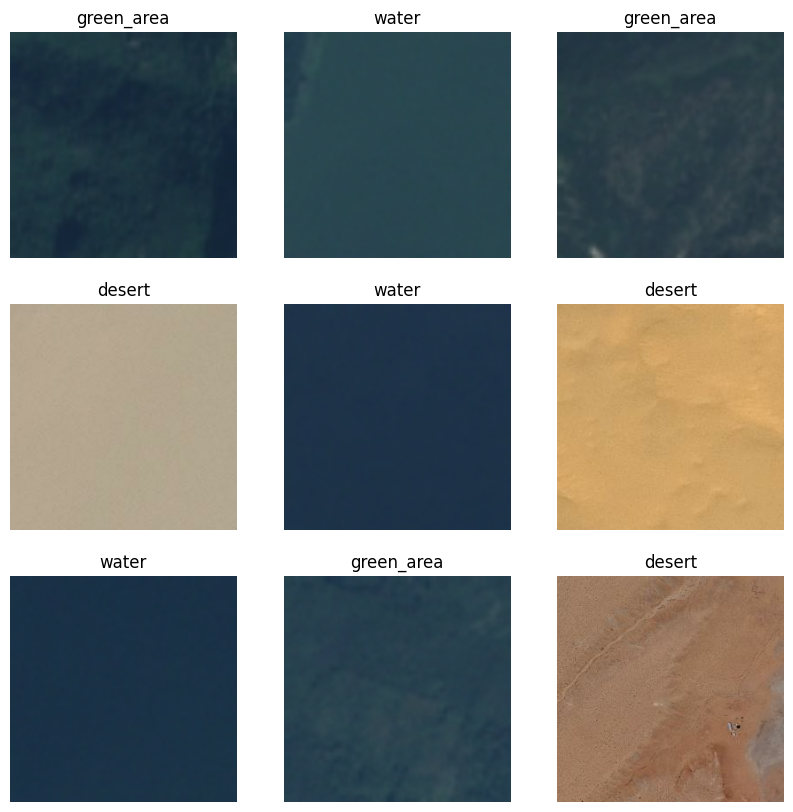

In [130]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy()
        img = (img * 255).astype("uint8")  # Rescale image back to [0, 255] range
        # plt.imshow(images[i].numpy().astype("uint8"))
        plt.imshow(img)
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()

In [131]:
from tensorflow.keras import layers, models

In [132]:
model = models.Sequential([
    # layers.Rescaling(1.0/255, input_shape=(img_height, img_width,3)),
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(8, ( 3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, ( 3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(class_names), activation = 'softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 16)      1168      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 61504)             0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [133]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
            )

In [134]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 4
)

Epoch 1/4
141/141 [==============================] - 101s 710ms/step - loss: 0.3457 - accuracy: 0.8453 - val_loss: 0.2762 - val_accuracy: 0.8668
Epoch 2/4
141/141 [==============================] - 106s 747ms/step - loss: 0.2183 - accuracy: 0.9010 - val_loss: 0.1866 - val_accuracy: 0.9210
Epoch 3/4
141/141 [==============================] - 102s 724ms/step - loss: 0.2060 - accuracy: 0.9112 - val_loss: 0.1819 - val_accuracy: 0.9183
Epoch 4/4
141/141 [==============================] - 99s 700ms/step - loss: 0.1749 - accuracy: 0.9265 - val_loss: 0.1689 - val_accuracy: 0.9281


In [135]:
test_loss, test_acc = model.evaluate(test_dataset)
print("\nTest accuracy:", test_acc)

36/36 [==============================] - 10s 262ms/step - loss: 0.1689 - accuracy: 0.9281

Test accuracy: 0.9280639290809631


1/1 [==============================] - 0s 28ms/step
Predicted class: desert with confidence 1.00


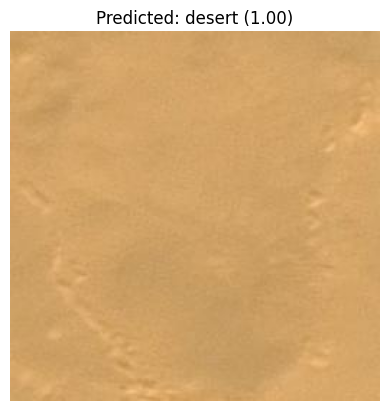

In [138]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define parameters
img_height = 256
img_width = 256
img_path = 'C:/Users/user/OneDrive/Desktop/assingment/data/desert/desert(206).jpg'

# Function to load and preprocess a single image for prediction
def load_and_preprocess_image(img_path, img_height, img_width):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to predict a single image
def predict_image(img_path, model, class_names, img_height=256, img_width=256):
    img_array = load_and_preprocess_image(img_path, img_height, img_width)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence_score = predictions[0][predicted_index]
    return predicted_class, confidence_score

# Example usage
img_path = img_path  # Replace with the path to your image
predicted_class, confidence_score = predict_image(img_path, model, class_names)
print(f"Predicted class: {predicted_class} with confidence {confidence_score:.2f}")

# Optional: Visualize the input image
img = image.load_img(img_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({confidence_score:.2f})")
plt.axis("off")
plt.show()
